In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

import kagglehub

In [22]:
m1="CIC-IDS-2017/Monday-WorkingHours.pcap_ISCX.csv"
t1="CIC-IDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv"
w1="CIC-IDS-2017/Wednesday-workingHours.pcap_ISCX.csv"
th1="CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
th2="CIC-IDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
f1="CIC-IDS-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv"
f2="CIC-IDS-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
f3="CIC-IDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"

dm1 = pd.read_csv(m1)
dt1 = pd.read_csv(t1)
dw1 = pd.read_csv(w1)
dth1 = pd.read_csv(th1)
dth2 = pd.read_csv(th2)
df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)

In [23]:
df = pd.concat([dm1,dt1,dw1,dth1,dth2,df1, df2, df3], axis=0)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [24]:
print("First few rows:\n", df.head())
print("Dataset info:\n", df.info())
print("Dataset description:\n", df.describe())

First few rows:
     Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0

In [28]:

class_counts = df.iloc[:, -1].value_counts()
print("Class Counts:\n", class_counts)

Class Counts:
  Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [5]:
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = RandomForestClassifier(n_estimators=20, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust n_features_to_select based on your needs
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=20, random_state=42),
    n_features_to_select=10)

In [11]:
selected_features = X.columns[rfe.support_]
print("Selected Features:\n", selected_features)

Selected Features:
 Index([' Destination Port', 'Total Length of Fwd Packets',
       ' Bwd Packet Length Std', ' Fwd Header Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' Subflow Fwd Bytes',
       ' Subflow Bwd Bytes', 'Init_Win_bytes_forward'],
      dtype='object')


In [12]:
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

In [13]:
model.fit(X_train_selected, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [14]:
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Selected Features:", accuracy)

Model Accuracy with Selected Features: 0.9980833698742521


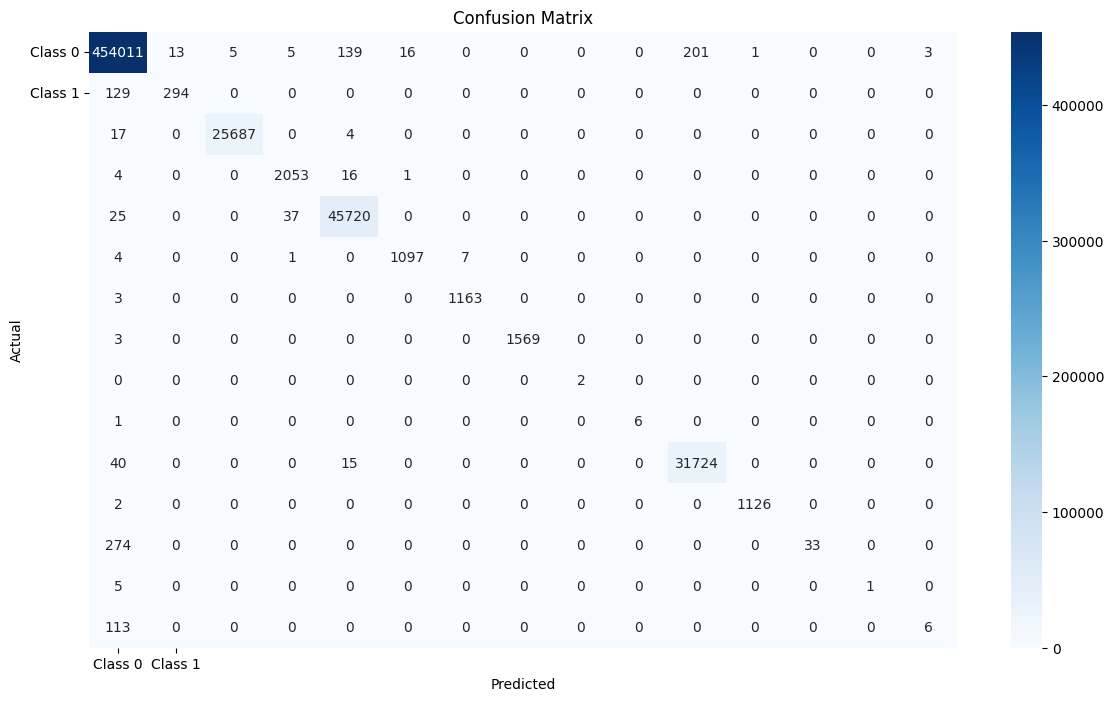

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454394
           1       0.96      0.70      0.81       423
           2       1.00      1.00      1.00     25708
           3       0.98      0.99      0.98      2074
           4       1.00      1.00      1.00     45782
           5       0.98      0.99      0.99      1109
           6       0.99      1.00      1.00      1166
           7       1.00      1.00      1.00      1572
           8       1.00      1.00      1.00         2
           9       1.00      0.86      0.92         7
          10       0.99      1.00      1.00     31779
          11       1.00      1.00      1.00      1128
          12       1.00      0.11      0.19       307
          13       1.00      0.17      0.29         6
          14       0.67      0.05      0.09       119

    accuracy                           1.00    565576
   macro avg       0.97      0.79      0.82    565576
we